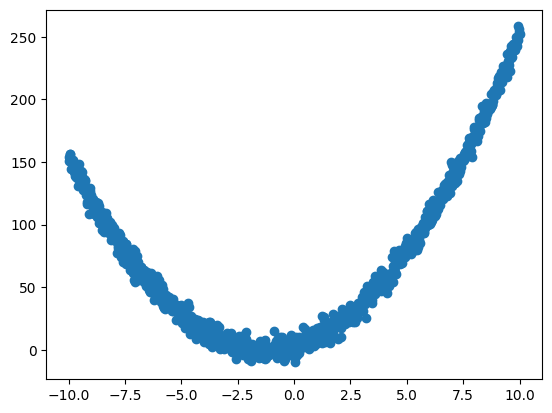

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(182)
X = np.linspace(-10,10,1000)
y = 2 * X**2 + 5*X +3 + np.random.normal(0,5,size = X.shape)
plt.scatter(X,y)
plt.show()

In [4]:
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train , X_test = X[:split_index], X[split_index:]
y_train , y_test = y[:split_index], y[split_index:]

In [5]:
def polynomial_transformation(X,degree = 2):
  return np.vstack([X**i for i in range(degree+1)]).T

transformed_X_train = polynomial_transformation(X_train,2)

transformed_X_test = polynomial_transformation(X_test,2)

In [6]:
class PolynomialRegression:
  def __init__(self,degree = 2, lr = 0.001,epochs = 1000):
    self.degree = degree
    self.lr = lr
    self.epochs = epochs
    self.weights = np.zeros(degree+1)

  def predict(self,X):
    return X @ self.weights # dot product


  def compute_mse(self,y_true,y_pred):
    return np.mean((y_true - y_pred)**2)

  def compute_rmse(self,y_true,y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))


  def fit(self,X,y):
    m = len(y)
    for _ in range(self.epochs):
      #prediction
      y_pred = self.predict(X)

      # error computation
      error = (y_pred - y)

      # gradient Computaion
      gradients = (1/m) * (X.T @ error)

      #weight updation
      self.weights -= self.lr *gradients
      if _ % 100 ==0:
        print("Epochs -> ",_," Loss is ",self.compute_mse(y,y_pred))

model_poly = PolynomialRegression(degree=2, lr=0.001, epochs=5000)
model_poly.fit(transformed_X_train, y_train)

# Make predictions
y_pred_train = model_poly.predict(transformed_X_train)
y_pred_test = model_poly.predict(transformed_X_test)

# Calculate errors
train_mse = model_poly.compute_mse(y_train, y_pred_train)
test_mse = model_poly.compute_mse(y_test, y_pred_test)
train_rmse = model_poly.compute_rmse(y_train, y_pred_train)
test_rmse = model_poly.compute_rmse(y_test, y_pred_test)

# Print results
print("Polynomial Coefficients (Gradient Descent):", model_poly.weights)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)



Epochs ->  0  Loss is  3632.3112429200582
Epochs ->  100  Loss is  61.5548097154154
Epochs ->  200  Loss is  31.338568554986452
Epochs ->  300  Loss is  28.047155217879077
Epochs ->  400  Loss is  27.429012773305857
Epochs ->  500  Loss is  27.101080105303023
Epochs ->  600  Loss is  26.826845651679246
Epochs ->  700  Loss is  26.58071804427698
Epochs ->  800  Loss is  26.358031057560424
Epochs ->  900  Loss is  26.156375433990217
Epochs ->  1000  Loss is  25.973747523942357
Epochs ->  1100  Loss is  25.808350215470952
Epochs ->  1200  Loss is  25.658557666208566
Epochs ->  1300  Loss is  25.522897595688182
Epochs ->  1400  Loss is  25.400036645222475
Epochs ->  1500  Loss is  25.288767256131802
Epochs ->  1600  Loss is  25.187995799427373
Epochs ->  1700  Loss is  25.096731826743703
Epochs ->  1800  Loss is  25.014078335542784
Epochs ->  1900  Loss is  24.939222952779883
Epochs ->  2000  Loss is  24.871429950364995
Epochs ->  2100  Loss is  24.810033013941865
Epochs ->  2200  Loss is 